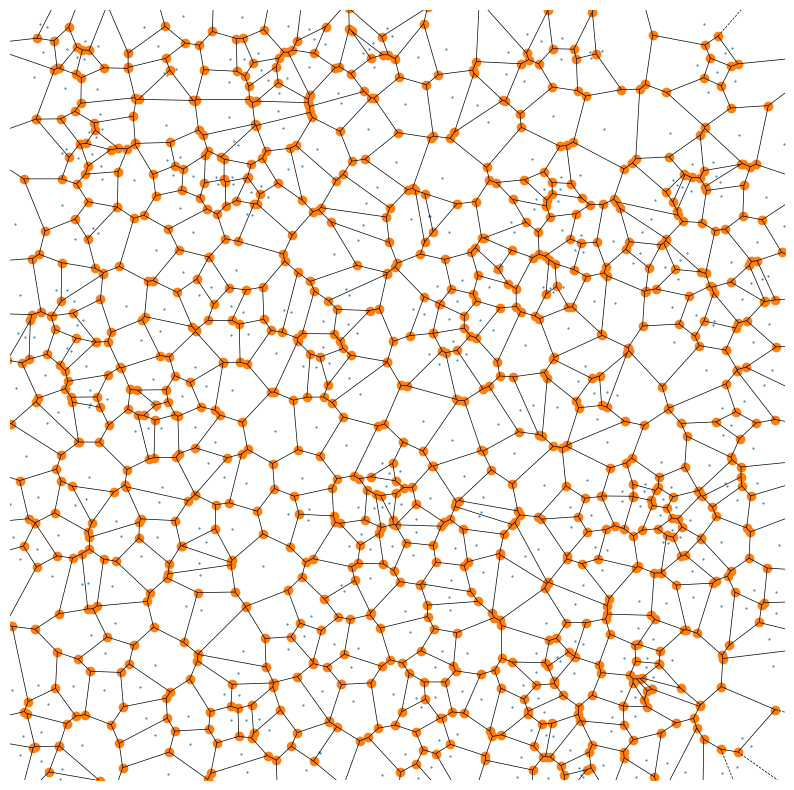

In [142]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib import pyplot as plt
from shapely.geometry import Polygon

#Let us generate a few random coordinates
coords = np.random.rand(500, 2)
vor = Voronoi(coords)

fig, ax = plt.subplots(figsize = [10,10])

fig = voronoi_plot_2d(vor, ax=ax, point_size = 1, show_vertices = True, line_width = 0.5)

ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_axis_off()
#plt.savefig('voronoi.png', dpi = 700, bbox_inches = 'tight')

6

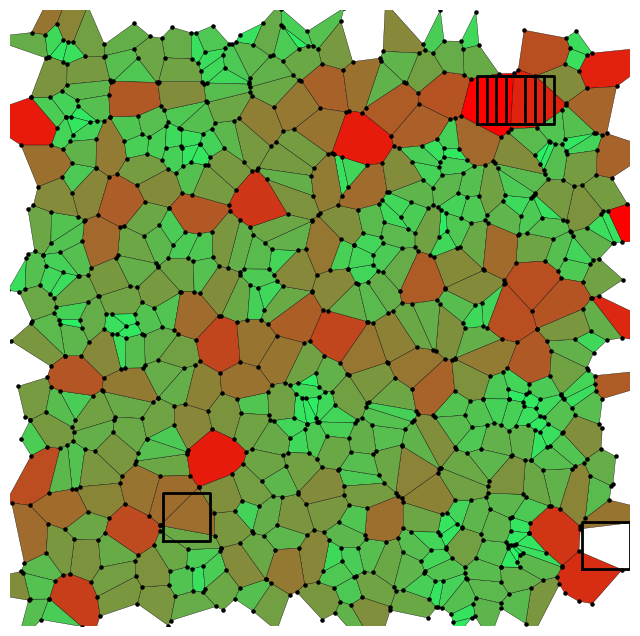

In [153]:
import matplotlib.collections as collections
from matplotlib.colors import Normalize, LinearSegmentedColormap
import matplotlib.cm as cm
from shapely.geometry import Polygon
import pandas as pd

polygons_coords = [vor.vertices[region] for region in vor.regions if (region and -1 not in region)]
shapely_polygons_areas = [Polygon(coord).area for coord in polygons_coords]

poly_df = pd.DataFrame({ 'Poly_coords' :polygons_coords,'Poly_areas' :shapely_polygons_areas})
poly_df = poly_df[poly_df['Poly_areas'] < 0.008]

x_vertices = vor.vertices.transpose()[0]
y_vertices = vor.vertices.transpose()[1]

fig, ax_1 = plt.subplots(figsize = [8,8])
ax_1.set_axis_off()
ax_1.set_xlim([0,1])
ax_1.set_ylim([0,1])

# Нормализуем площади для цветовой карты
norm = Normalize(vmin=min(poly_df['Poly_areas']), vmax=max(poly_df['Poly_areas']))
cmap = cm.Wistia
custom_cmap = LinearSegmentedColormap.from_list('custom_gradient', ["#24f767", '#ff0000'])


# Создаем цвета для каждого полигона
colors = [custom_cmap(norm(area)) for area in poly_df['Poly_areas']]
polygons_coll = collections.PolyCollection(
    poly_df['Poly_coords'], 
    facecolors=colors,
    alpha=1,
    edgecolors='black',
    linewidths=0.25
)
ax_1.add_collection(polygons_coll)
ax_1.scatter(x_vertices, y_vertices, s = 5, c='k')

square_side_lenght = 0.08
step = 0.015
full_steps = np.linspace(0, 1, int(1/step))
count = 0
for i in range(int(1/step) - int(square_side_lenght / step)):
    for j in range(int(1/step) - int(square_side_lenght / step)):
        x_lim = [full_steps[i], full_steps[i + int(square_side_lenght / step)]]
        x_lim_dots = []
        for k in range(len(x_vertices)):
            if vor.vertices[k][0] > x_lim[0] and vor.vertices[k][0] < x_lim[1]:
                x_lim_dots.append(vor.vertices[k])
        y_lim = [full_steps[j], full_steps[j + int(square_side_lenght / step)]]
        xy_lim_dots = []
        for l in range(len(x_lim_dots)):
            if x_lim_dots[l][1] > y_lim[0] and x_lim_dots[l][1] < y_lim[1]:
                xy_lim_dots.append(x_lim_dots[l])
        if len(xy_lim_dots) == 0:
            x_squre_coords = [x_lim[0], x_lim[1], x_lim[1],x_lim[0], x_lim[0]]
            y_squre_coords = [y_lim[0], y_lim[0], y_lim[1], y_lim[1], y_lim[0]]
            ax_1.plot(x_squre_coords, y_squre_coords, c = 'k', linewidth = 2)
            count += 1
#plt.savefig('cm_voronoi.png', dpi = 700, bbox_inches = 'tight')
count

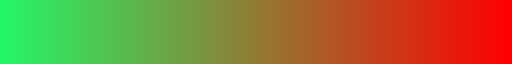

In [85]:
custom_cmap

0.0489734395111105

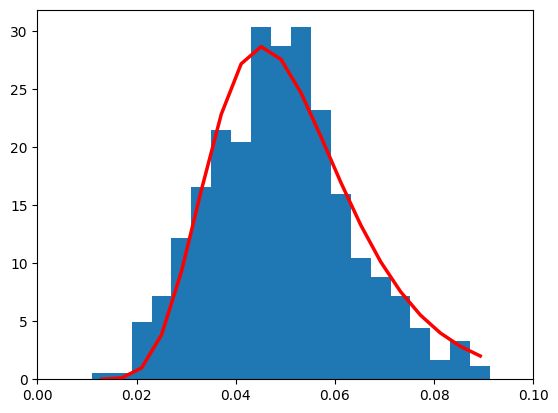

In [150]:
from scipy.optimize import curve_fit

fig, ax = plt.subplots()
ax.set_xlim([0,0.1])
def log_norm(x, mu, sigma):
    return 1/(x * sigma * np.sqrt(2 * np.pi)) * np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
counts, bins, _ = ax.hist(2 * np.sqrt(poly_df['Poly_areas'] / np.pi ), bins=20, density=True)
bin_centers = (bins[1:] + bins[:-1]) / 2
popt, _ = curve_fit(log_norm, bin_centers, counts, p0=[0, 1])
log_norm_points = log_norm(bin_centers, *popt)
ax.plot(bin_centers, log_norm_points , color='red', label='Fitted curve', linewidth = 2.5)
np.mean(2 * np.sqrt(poly_df['Poly_areas'] / np.pi ))